<a href="https://colab.research.google.com/github/munich-ml/MLPy2021/blob/main/11_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

NumPy is an array proessing package for Python. 

NumPy is written in C what makes computations with NumPy very fast.

NumPy is usually imported as **np** (alias):

In [1]:
import numpy as np   
import matplotlib.pyplot as plt

The basic NumPy datatype is the NumPy array:

In [2]:
z = np.array([2, 4, 7])
z

array([2, 4, 7])

# NumPy arrays vs. lists

## Similarities

NumPy arrays share some properties with Python lists, e.g. slicing: 

In [3]:
a = [2, 7, 5, 1]

In [4]:
a[1:-1]

[7, 5]

In [5]:
z = np.array(a)
z

array([2, 7, 5, 1])

In [6]:
z[1:-1]

array([7, 5])

## Differences

#### Data types
- Python lists may contain multiple data types, while
- NumPy arrays are **constant type**:

In [7]:
a = [2, 7, 1]
z = np.array(a)
z.dtype

dtype('int64')

In [8]:
a = [2, "seven", 1]
z = np.array(a)
z

array(['2', 'seven', '1'], dtype='<U21')

... all items are converted to text. `U` for unicode and `21` describes the memory allocation for each item. 

### Element-wise operations
- **list** objects don't support element-wise operations:


In [9]:
a = [1, 3, 4] 
b = [1, 3, 5]

In [10]:
try:
    a * b
except Exception as e:
    print(e)

can't multiply sequence by non-int of type 'list'


- **NumPy arrays** are made for element-wise operations:

In [11]:
np.array(a) * np.array(b)

array([ 1,  9, 20])

# Initializing NumPy arrays

Initializing **all zeros**:

In [12]:
shape = (2, 3)
np.zeros(shape)

array([[0., 0., 0.],
       [0., 0., 0.]])

Initializing **all ones** with specific data type:

In [13]:
shape = (2, 4)
np.ones(shape, dtype="int32")

array([[1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

Initializing with **arbitraty value**:

In [14]:
np.full(shape=(2, 3), fill_value=1.33)

array([[1.33, 1.33, 1.33],
       [1.33, 1.33, 1.33]])

### Initalizing with **random numbers**

Random **integers**

In [15]:
np.random.randint(low=3, high=7, size=(10,))

array([3, 3, 4, 6, 4, 3, 4, 6, 4, 4])

Set the random **seed** prior to sample generation for reproducable results.

In [16]:
np.random.seed(seed=42)

Many different distributions are available for random numbers, such as `np.random.normal` **Gaussian** and `np.random.uniform`:

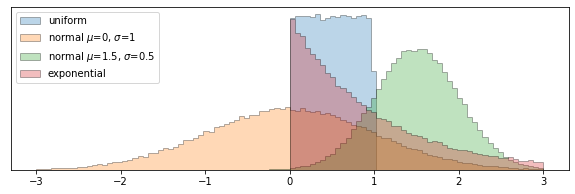

In [17]:
N = 100000
kwa = dict(bins=np.linspace(-3, 3, 101), histtype='stepfilled', alpha=0.3, ec="k")
plt.figure(figsize=(10,3))
plt.hist(np.random.uniform(size=N), label="uniform", **kwa)
for mu, sigma in zip((0, 1.5), (1, 0.5)):
    label = "normal $\mu$={}, $\sigma$={}".format(mu, sigma)
    plt.hist(np.random.normal(mu, sigma, N), label=label, **kwa)
plt.hist(np.random.exponential(size=N), label="exponential", **kwa)
plt.legend(loc="upper left"), plt.yticks([]);

In [18]:
np.random?

# NumPy math

## Element-wise operations

In [75]:
z = np.array([1, 2, 3, 4])

In [76]:
z + 4

array([5, 6, 7, 8])

In [77]:
z / 2

array([0.5, 1. , 1.5, 2. ])

In [78]:
z

array([1, 2, 3, 4])

In [80]:
np.round(np.sin( z/4 * np.pi), decimals=3)

array([0.707, 1.   , 0.707, 0.   ])

## Matrix multiplication

In [82]:
z = np.ones(shape=(2, 3))
z

array([[1., 1., 1.],
       [1., 1., 1.]])

In [83]:
y = np.full(shape=(3,2), fill_value=2)
y

array([[2, 2],
       [2, 2],
       [2, 2]])

In [84]:
try:
    z * y
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (2,3) (3,2) 


... `z * y` tries element-wise multiplications, which failes because of the different shapes. 

For matrix multiplication use `np.matmul` instead:

In [85]:
np.matmul(z, y)

array([[6., 6.],
       [6., 6.]])

In [86]:
np.matmul(y, z)

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

## Transposing matricies

`array.T` returns the transpose of the array

In [87]:
z = np.array([[1,2,3], [4,5,6]])
print(z, z.shape)

[[1 2 3]
 [4 5 6]] (2, 3)


In [88]:
print(z.T, z.T.shape)

[[1 4]
 [2 5]
 [3 6]] (3, 2)


## Statistics

In [89]:
z = np.array([[1,2,3], [4,5,6]])
z

array([[1, 2, 3],
       [4, 5, 6]])

Min of all values:

In [90]:
z.min()

1

Min of all columns:

In [91]:
z.min(axis=1)

array([1, 4])

Standard deviation

In [92]:
z.std()

1.707825127659933

In [93]:
np.median(z, axis=1)

array([2., 5.])

## Booleans

 

- `np.all()` is a logical `AND`
- `np.any()` is a logical `OR`

#### Logical `AND`

In [94]:
z = np.array([[True, True, False, True], [True, True, True, True]])
z

array([[ True,  True, False,  True],
       [ True,  True,  True,  True]])

In [95]:
z.all()

False

In [96]:
z.all(axis=1)

array([False,  True])

#### Logical `OR`

In [97]:
z.any()

True

#### Logical `NOT`

In [98]:
np.logical_not(z.all(axis=0))

array([False, False,  True, False])

# Reorganizing arrays

## Reshape

In [102]:
z = np.array([[1,2,3], [4,5,6]])
z

array([[1, 2, 3],
       [4, 5, 6]])

In [103]:
z.shape

(2, 3)

**Option 1**: Use `reshape` method:

In [104]:
z = z.reshape((3, 2))
z

array([[1, 2],
       [3, 4],
       [5, 6]])

In [105]:
z.shape

(3, 2)

**Option 2**: Assign a new shape to the `.shape` attribute:

In [108]:
z.shape = (6, )
z

array([1, 2, 3, 4, 5, 6])

In [110]:
z.shape

(6,)

## Concatenation

In [111]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [112]:
b = np.array([[7,8,9], [10,11,12]])
b

array([[ 7,  8,  9],
       [10, 11, 12]])

### `np.vstack()`  

`np.vstack()` is equivalent to `np.concatenate(..., axis=0)`:

In [113]:
z = np.concatenate((a, b), axis=0)
z

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [114]:
z = np.vstack((a, b))
z

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

### `np.hstack()`  

`np.hstack()` is equivalent to `np.concatenate(..., axis=1)`:

In [115]:
z = np.concatenate((a, b), axis=1)
z

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [116]:
z = np.hstack((a, b))
z

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

### Concat arrays and slices (1D arrays)


In [117]:
z = np.linspace(start=0, stop=11, num=12, dtype="int8")
z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int8)

In [118]:
z.shape = (6, 2)
z

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]], dtype=int8)

Compute new features (columns) based on exisitng features:

In [119]:
new_sum = z[:, 0] + z[:, 1]
new_sum

array([ 1,  5,  9, 13, 17, 21], dtype=int8)

In [120]:
new_prod = z[:, 0] * z[:, 1]
new_prod

array([  0,   6,  20,  42,  72, 110], dtype=int8)

Trial to concatenate new features to the right fails:

In [121]:
try:
    new_z = np.concatenate((z, new_sum, new_prod), axis=0)
except Exception as e:
    print("Exception occured: " + str(e))

Exception occured: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)


Problem: The new features are slices (1D arrays), not 2D arrays:

In [122]:
print(z.ndim, z.shape)

2 (6, 2)


In [123]:
print(new_sum.ndim, new_sum.shape)

1 (6,)


#### Option 1: Reshape first
Manually reshape the new features before concatanation

In [124]:
new_sum.shape

(6,)

In [125]:
for array in [new_sum, new_prod]:
    new_shape = (array.size, 1)
    array.shape = new_shape

In [126]:
new_sum.shape

(6, 1)

In [127]:
np.hstack([z, new_sum, new_prod])

array([[  0,   1,   1,   0],
       [  2,   3,   5,   6],
       [  4,   5,   9,  20],
       [  6,   7,  13,  42],
       [  8,   9,  17,  72],
       [ 10,  11,  21, 110]], dtype=int8)

#### Option 2: `np.column_stack(tup)`
Stacks 1D or 2D arrays as columns into a 2D array.
- 2D arrays are stacked as-is, just like with `hstack`.  
- 1D arrays are turned into 2D arrays
first.

Recreating the test bench:

In [128]:
z

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]], dtype=int8)

Recalculate the new features in order to undo the manual reshaping and to get 1D arrays, again.

In [129]:
new_sum = z[:, 0] + z[:, 1]
new_sum

array([ 1,  5,  9, 13, 17, 21], dtype=int8)

In [130]:
new_prod = z[:, 0] * z[:, 1]
new_prod

array([  0,   6,  20,  42,  72, 110], dtype=int8)

In [131]:
np.column_stack([z, new_sum, new_prod])

array([[  0,   1,   1,   0],
       [  2,   3,   5,   6],
       [  4,   5,   9,  20],
       [  6,   7,  13,  42],
       [  8,   9,  17,  72],
       [ 10,  11,  21, 110]], dtype=int8)

#### Option 3: Deep dive `np.c_`, `np.r_` 

- `.c_`: https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
- `.r_`: https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html

In [132]:
np.c_[z, new_sum, new_prod]

array([[  0,   1,   1,   0],
       [  2,   3,   5,   6],
       [  4,   5,   9,  20],
       [  6,   7,  13,  42],
       [  8,   9,  17,  72],
       [ 10,  11,  21, 110]], dtype=int8)

In [138]:
np.r_[z, np.c_[new_sum, new_prod]]

array([[  0,   1],
       [  2,   3],
       [  4,   5],
       [  6,   7],
       [  8,   9],
       [ 10,  11],
       [  1,   0],
       [  5,   6],
       [  9,  20],
       [ 13,  42],
       [ 17,  72],
       [ 21, 110]], dtype=int8)

## Advanced indexing

In [139]:
z = np.random.randint(16, size=(3, 5))
z

array([[ 0, 15,  4, 11,  1],
       [ 0,  6, 11, 11,  9],
       [ 6, 15, 11, 13,  2]])

Create a **masking array**, e.g. where the values are greater than a limit:

In [140]:
mask = z > 9
mask

array([[False,  True, False,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False]])

.. and index the array at the *mask* positions:

In [141]:
z[mask]

array([15, 11, 11, 11, 15, 11, 13])

# Appendix

### NumPy versus list - speed comparison
Measure the compute time to find the smallest value within a list / array.

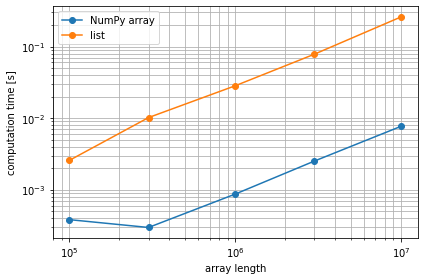

In [144]:
%matplotlib inline
from time import time
import matplotlib.pyplot as plt

labels = ["NumPy array", "list"]
compute_times = [[], []]
lengths = (1e5, 3e5, 1e6, 3e6, 1e7)
for length in lengths:
    np_vals = np.random.random_sample(size=(int(length),))
    list_vals = list(np_vals)
    funcs = [np_vals.min, lambda: min(list_vals)]

    for func, compute_time in zip(funcs, compute_times):
        t0 = time()
        func()
        compute_time.append(time() - t0)

for compute_time, label in zip(compute_times, labels):
    plt.loglog(lengths, compute_time, "o-", label=label)

plt.xlabel("array length"), plt.ylabel("computation time [s]")
plt.legend(), plt.grid(which="both"), plt.tight_layout();

## [NumPy Cheat Sheet](https://github.com/munich-ml/MLPy2021/blob/main/cheat_sheets/NumPy_cheat_sheet.pdf)